# Test integración y Usabilidad

In [2]:
import pandas as pd

bit4 = pd.read_csv("./ejemplos4bit.csv")
NCp = pd.read_csv("./NoCuantpreguntas.csv")
NCr = pd.read_csv("./NoCuantrespuestas.csv")
NCe = pd.read_csv("./NoCuantEvals.csv")

In [3]:
bit4preg = bit4[bit4["accion"] == "generar pregunta" ]
bit4res = bit4[bit4["accion"] == "generar respuesta" ]
bit4eval = bit4[bit4["accion"] == "generar evaluacion" ]

### Gráficas de tiempos para comparar

In [4]:
from matplotlib import pyplot as plt

In [5]:
media4bit = bit4["tiempo"].to_numpy().sum() / 15
media4bit

16.91090834935506

In [6]:
mediaNC = pd.concat([NCp, NCe, NCr])["tiempo"].to_numpy().sum() / 15
mediaNC

421.3543510437012

#### Ratio alrededor de 25 veces mayor

In [7]:
mediaNC / media4bit

24.916127646080618

<BarContainer object of 2 artists>

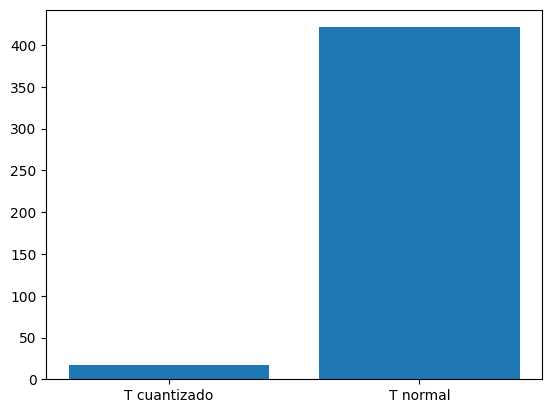

In [8]:
plt.bar(["T cuantizado", "T normal"], [media4bit, mediaNC])

# Comparamos las opiniones de los usuarios

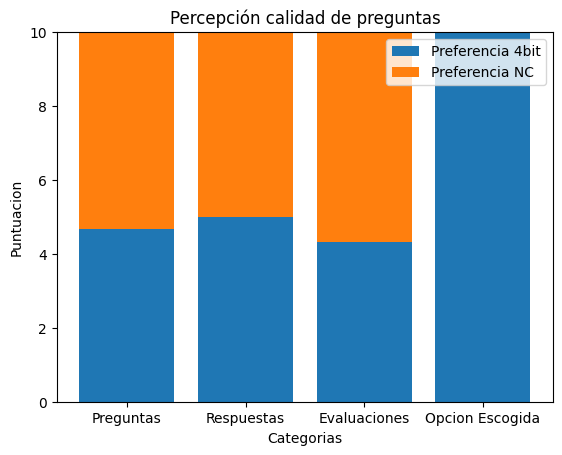

In [11]:
# Values
bit4 = [
    (6+4+4)/3, (6+5+4)/3, (6+4+3)/3, 10
]
NC = [
    10 - (6+4+4)/3, 10 - (6+5+4)/3, 10 -(6+4+3)/3, 0
]

# Labels
labels = ['Preguntas', "Respuestas", "Evaluaciones", "Opcion Escogida"]

# Bar positions
positions = range(len(labels))

# Plotting the stacked bar
plt.bar(positions, bit4, label='Preferencia 4bit')
plt.bar(positions, NC, bottom=bit4, label='Preferencia NC')

# Adding labels and title
plt.xlabel('Categorias')
plt.ylabel('Puntuacion')
plt.title('Percepción calidad de preguntas')
plt.xticks(positions, labels)
plt.legend()

# Show the plot
plt.show()

## Los exportamos para la usabilidad

In [8]:
preg = pd.concat([ bit4preg, NCp ])
res = pd.concat([ bit4res, NCr ])
eval = pd.concat([ bit4eval, NCe ])

### Los convertimos en Excel

In [14]:
with pd.ExcelWriter("CalidadRespuestas.xlsx") as writter:
    preg.to_excel(writter, sheet_name="Generar Preguntas", index=False)
    res.to_excel(writter, sheet_name="Generar Respuestas", index=False)
    eval.to_excel(writter, sheet_name="Generar Evaluaciones", index=False)